In [1]:
## Parameters specific to where your folders are and your data
parameter_file = '../parameters/params.yaml'
import yaml
import sys

with open(parameter_file,'r') as f:
    doc = yaml.load(f)

#p = dic2obj(**doc)

data_folder = doc['data_folder']
tissues = doc['tissues'].split(',')
sys.path.append(doc['pipeline_path'])
ref_fa = doc['ref_fa']
anno_gff=doc['annotation']



import os
from os.path import join
import sys
import pandas as pd
import seaborn as sns
import pickle
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from itertools import product
import glob
import re
from matplotlib_venn import venn2
from matplotlib import rcParams
import inspect
mpl.style.use('ggplot')

%matplotlib inline
#%config InlineBackend.figure_format = 'retina'
sys.setrecursionlimit(3000)
%load_ext autoreload
%autoreload 2
#rcParams['figure.figsize'] = 8, 6
import tqdm

from os.path import basename

os.chdir(doc["results"])

#from Homer import *
from tss.visualize import plot_tss_results 

print('Number of tissues: ',len(tissues))

/home/isshamie/software/anaconda2/envs/TSS/lib/python3.7/site-packages/ipykernel_launcher.py:7: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  import sys


params {'EMAIL': 'isshamie@ucsd.edu', 'parameters': 'parameters/params.yaml'}
Number of tissues:  13


In [2]:
from mplh.color_utils import get_colors
from mplh.fig_utils import legend_from_color, helper_save

In [3]:
os.chdir(doc["results"])
savedir = "Figure2"
f_save = join(savedir, "genes_barplot")
if not os.path.exists(savedir):
    os.mkdir(savedir)

In [4]:
landmark_name='genes'
f_in = 'analysis_ncbi_picr/tss_annotation/gene_df_02_tissues.p' 
df = pickle.load(open(f_in,'rb'),encoding='latin')
f_save = os.path.join(savedir,'gene_df_02_tissues_frac_unique.png')

Generating palette: 100% |######################################| Time: 0:00:08


Overall
11
9
7
5
3
1


,BMDM1hKLA,BMDMwt,Brain,FemaleReproductive,Heart,Kidney,Liver,Lung,MiscOrgans,Muscle,Pancreas,Spleen,CHO,Cumulative
Overall,8103,8513,13017,11814,10567,11559,10148,11947,11937,11423,9787,10909,9853,15317
11,1577,1779,5924,4719,3610,4475,3180,4853,4852,4335,2979,3825,3065,8222
9,855,913,3831,2643,1854,2436,1554,2784,2817,2291,1470,1839,1656,6119
7,571,563,2642,1543,1051,1445,944,1704,1720,1257,858,987,1064,4880
5,369,335,1793,859,570,831,558,1012,976,651,496,542,695,3857
3,236,198,1076,387,226,436,291,499,455,267,210,258,445,2807
1,94,58,340,63,38,119,70,105,112,36,23,65,198,1321


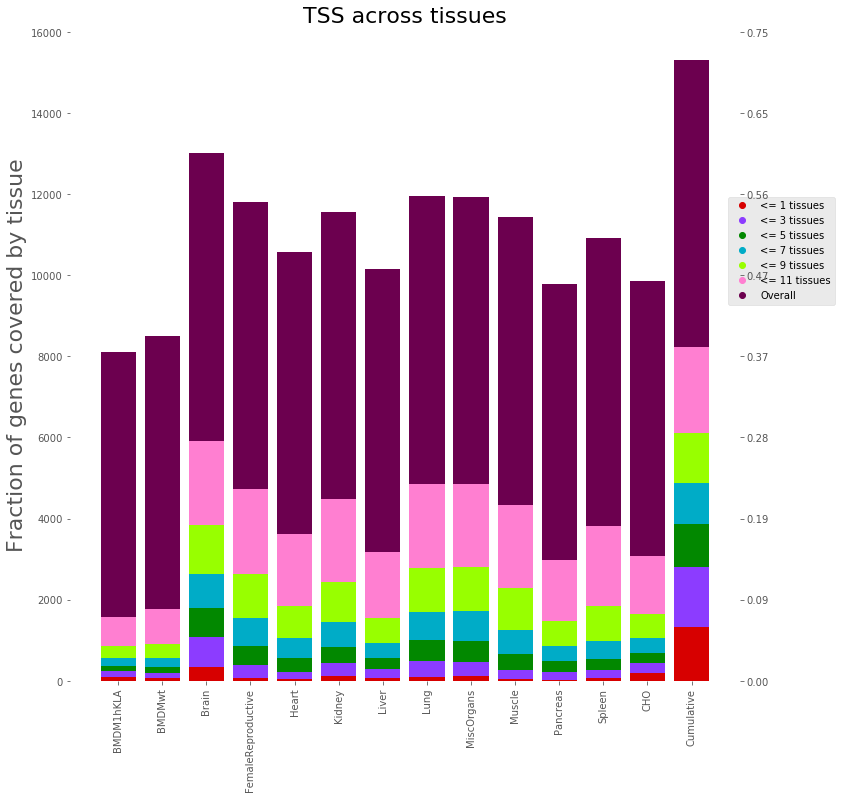

In [5]:
results_df,num_genes = plot_tss_results.plot_tss_across_tissues_plus_seen_in_others(df, tissues, landmark_name,
                                            f_save=f_save,
                                            tissue_list='Tissues',
                                            not_in_cho=False,
                                            verbose=True,
                                            to_plot=True,
                                            tis_n=(1,3,5,7,9,11))
print("number of genes", num_genes)
results_df

Generating palette: 100% |######################################| Time: 0:00:06


Overall
11
9
7
5
3
1


,BMDM1hKLA,BMDMwt,Brain,FemaleReproductive,Heart,Kidney,Liver,Lung,MiscOrgans,Muscle,Pancreas,Spleen,CHO,Cumulative
Overall,8103,8513,13017,11814,10567,11559,10148,11947,11937,11423,9787,10909,9853,15317
11,1577,1779,5924,4719,3610,4475,3180,4853,4852,4335,2979,3825,3065,8222
9,855,913,3831,2643,1854,2436,1554,2784,2817,2291,1470,1839,1656,6119
7,571,563,2642,1543,1051,1445,944,1704,1720,1257,858,987,1064,4880
5,369,335,1793,859,570,831,558,1012,976,651,496,542,695,3857
3,236,198,1076,387,226,436,291,499,455,267,210,258,445,2807
1,94,58,340,63,38,119,70,105,112,36,23,65,198,1321


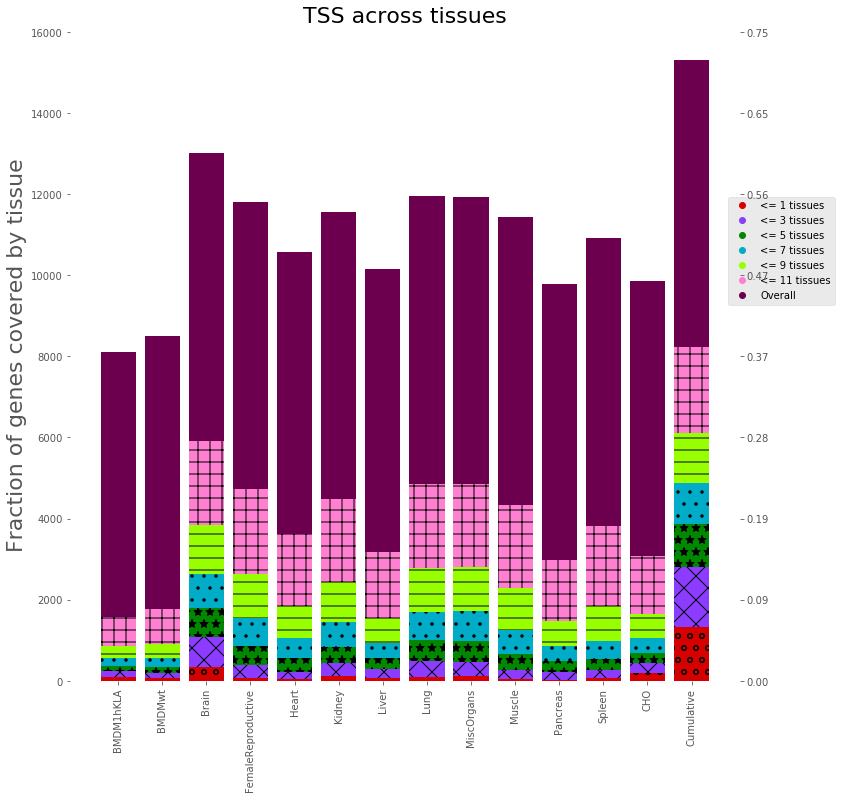

In [9]:
results_df,num_genes = plot_tss_results.plot_tss_across_tissues_plus_seen_in_others(df, tissues, landmark_name,
                                            f_save=f_save+'_shaders',
                                            tissue_list='Tissues',
                                            not_in_cho=False,
                                            verbose=True, use_markers=True,
                                            to_plot=True,
                                            tis_n=(1,3,5,7,9,11))
results_df